In [1]:
import sys
# sys.path.insert(0, '/home/auvdock/Rakesh/OSU/Spring 21/Deep Learning/PlanarGrasping/')
sys.path.insert(0, '/home/tim/Classes/CS535/PlanarGrasping/')

import pickle
import matplotlib.pyplot as plt

from network.model import net, data_loader
from network import utils
import numpy as np

from IPython import display
%matplotlib inline

import torch

import torch.optim as optim

In [2]:
# json_path = '/home/auvdock/Rakesh/OSU/Spring 21/Deep Learning/PlanarGrasping/network/experiments/sdf_cnn/params.json'
json_path = '/home/tim/Classes/CS535/PlanarGrasping/network/experiments/sdf_cnn/params.json'
params = utils.Params(json_path)
params.cuda = torch.cuda.is_available()

# data_dir = '/home/auvdock/Rakesh/OSU/Spring 21/Deep Learning/PlanarGrasping/network/data'
data_dir = '/home/tim/Classes/CS535/PlanarGrasping/network/data'

# fetch dataloaders
dataloaders = data_loader.fetch_dataloader(
    ['train', 'val'],data_dir, params)
train_dl = dataloaders['train']
val_dl = dataloaders['val']

# Define the model and optimizer
model = net.Net(params).cuda()
optimizer = optim.Adam(model.parameters(), lr=params.learning_rate)

model.eval()

# reload weights from restore_file if specified
# weight_file = '/home/auvdock/Rakesh/OSU/Spring 21/Deep Learning/PlanarGrasping/network/experiments/sdf_cnn/best.pth.tar'
weight_file = '/home/tim/Classes/CS535/PlanarGrasping/network/experiments/sdf_cnn/best.pth.tar'
utils.load_checkpoint(weight_file, model, optimizer)
print()


(10000,)
(10000,)
(10000,)


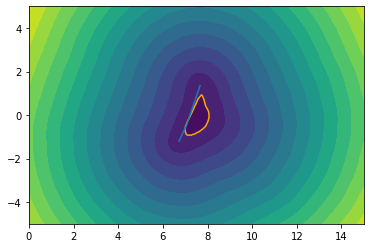

(10000,)
(10000,)
(10000,)


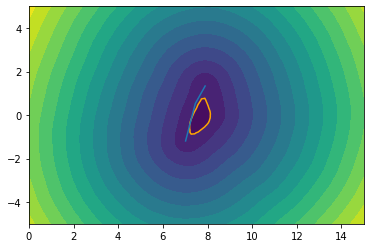

(10000,)
(10000,)
(10000,)


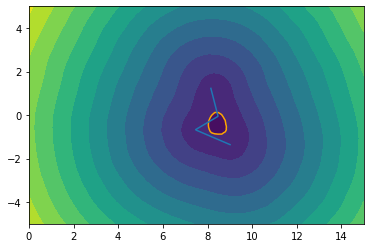

(10000,)
(10000,)
(10000,)


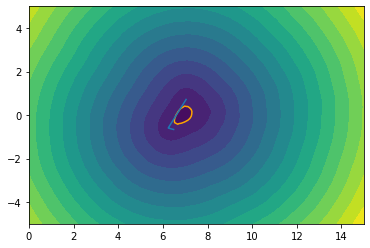

(10000,)
(10000,)
(10000,)


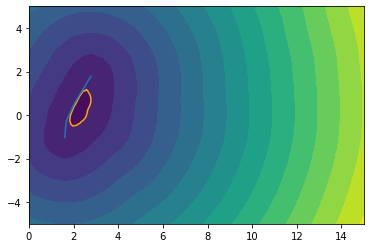

(10000,)
(10000,)
(10000,)


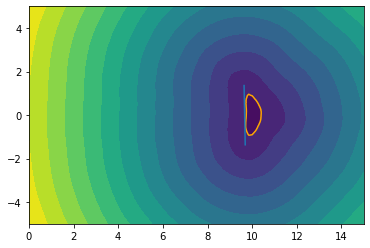

(10000,)
(10000,)
(10000,)


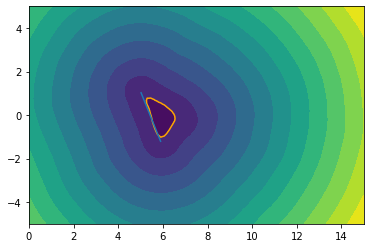

(10000,)
(10000,)
(10000,)


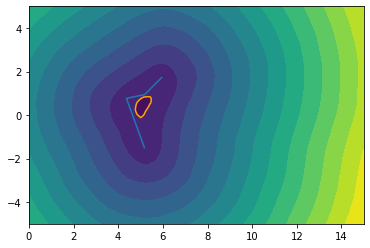

(10000,)
(10000,)
(10000,)


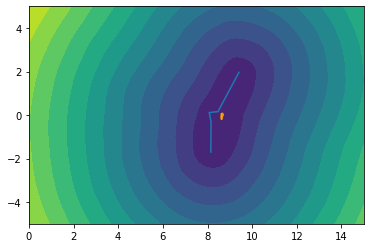

(10000,)
(10000,)
(10000,)


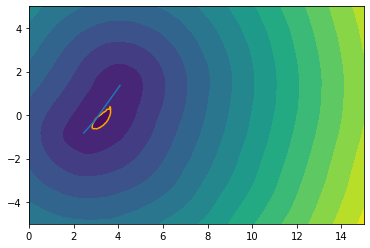

(10000,)
(10000,)
(10000,)


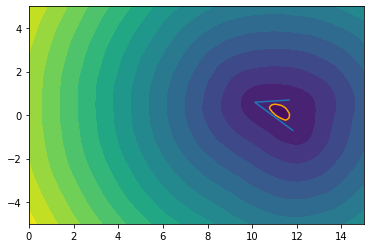

(10000,)
(10000,)
(10000,)


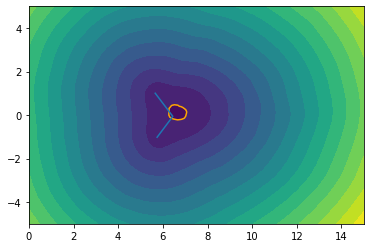

(10000,)
(10000,)
(10000,)


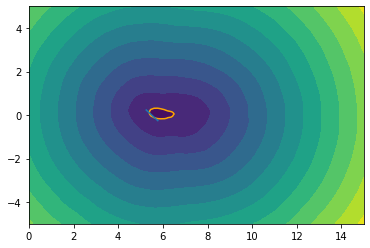

(10000,)
(10000,)
(10000,)


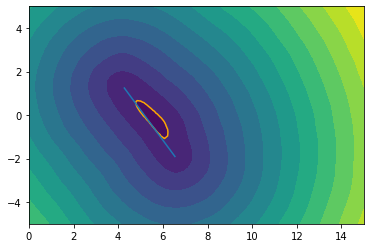

(10000,)
(10000,)
(10000,)


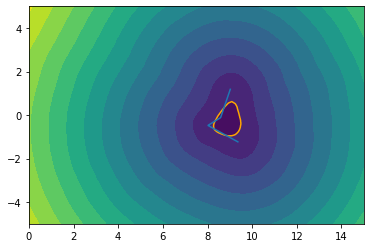

(10000,)
(10000,)
(10000,)


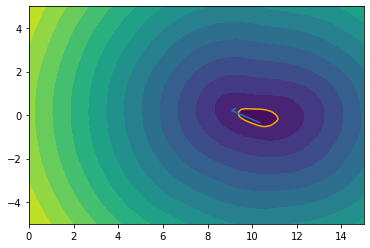

(10000,)
(10000,)
(10000,)


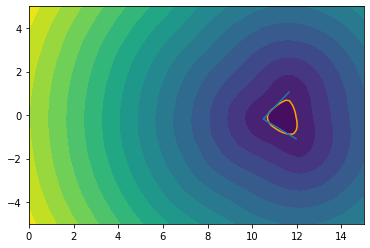

(10000,)
(10000,)
(10000,)


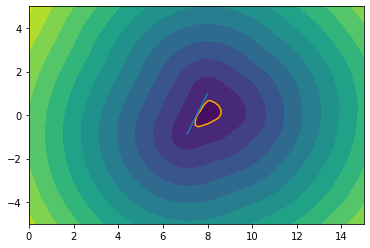

(10000,)
(10000,)
(10000,)


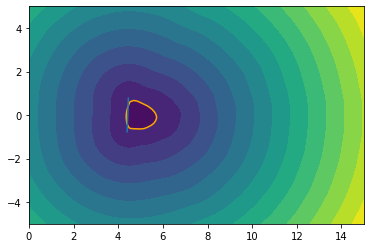

(10000,)
(10000,)
(10000,)


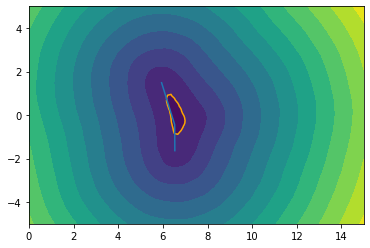

(10000,)
(10000,)
(10000,)


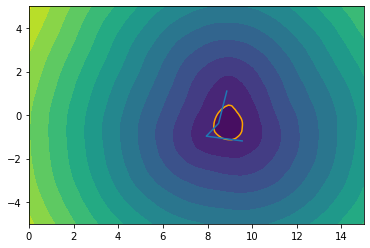

(10000,)
(10000,)
(10000,)


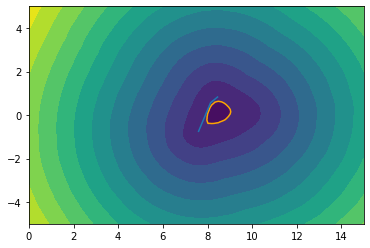

(10000,)
(10000,)
(10000,)


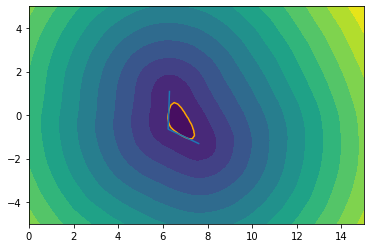

(10000,)
(10000,)
(10000,)


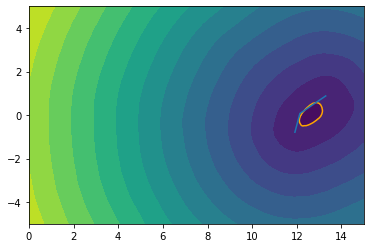

(10000,)
(10000,)
(10000,)


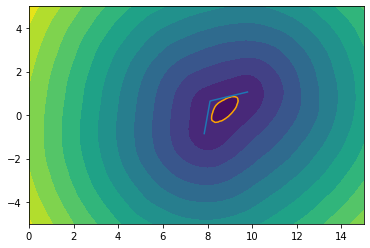

(10000,)
(10000,)
(10000,)


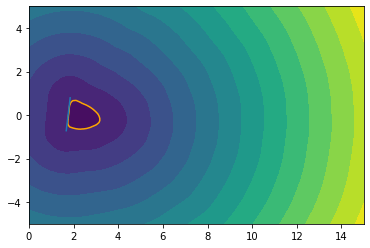

In [3]:
for i, (train_batch, labels_batch) in enumerate(val_dl):

    scan_pts = train_batch[0][:-1,:].numpy()
    bounds = [0, 15, -5, 5]
    xs = np.linspace(*bounds[:2], 100)
    ys = np.linspace(*bounds[2:], 100)
    X, Y = np.meshgrid(xs, ys)
    pts = np.column_stack([
        X.ravel(),
        Y.ravel()
    ])

    dists = []
    for pt in pts:
        s = torch.Tensor(np.vstack([scan_pts, pt])).cuda().unsqueeze(0)
        dists.append(model.forward(s)[0].cpu().detach().numpy())

    dists = np.array(dists).squeeze()
    fig, ax = plt.subplots()
    # ax.scatter(X.ravel(), Y.ravel(), c=dists)
    ax.tricontourf(X.ravel(), Y.ravel(), dists, levels=14, cmap="viridis")
    ax.tricontour(X.ravel(), Y.ravel(), dists, levels=[0], colors='orange')
    ax.plot(scan_pts[:,0], scan_pts[:,1])
    plt.pause(0.01)

In [ ]:
for i, (train_batch, labels_batch) in enumerate(val_dl):
    scan_pts = train_batch[0][:-1,:].numpy()
    query_pt = train_batch[0][-1,:].numpy()
    print(query_pt)
    print(labels_batch[0])
    print(model.forward(train_batch[0].float().cuda()))
    break